In [ ]:
#DATA LOAD
import pandas as pd

# Load dataset
df = pd.read_csv("/content/online_retail.csv", encoding="latin1")

# First look
df.head()


/tmp/ipython-input-1599420372.py:4: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/online_retail.csv", encoding="latin1")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Shape check
df.shape


(211348, 8)

In [ ]:
#Column names
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#Data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211348 entries, 0 to 211347
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    211348 non-null  object 
 1   StockCode    211348 non-null  object 
 2   Description  210531 non-null  object 
 3   Quantity     211347 non-null  object 
 4   InvoiceDate  211347 non-null  object 
 5   UnitPrice    211347 non-null  float64
 6   CustomerID   151067 non-null  object 
 7   Country      211346 non-null  object 
dtypes: float64(1), object(7)
memory usage: 12.9+ MB


In [ ]:
#MISSING VALUES CHECK
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,817
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,60281
Country,2


In [ ]:
#Cancelled orders
df[df['InvoiceNo'].astype(str).str.startswith('C')].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
#Negative / zero price
df[df['UnitPrice'] <= 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
209963,554021,20886,NaN,-65,2011-05-20 13:18:00,0.0,NaN,United Kingdom
209964,554022,20886,NaN,10,2011-05-20 13:19:00,0.0,NaN,United Kingdom
209965,554023,82613B,NaN,-71,2011-05-20 13:20:00,0.0,NaN,United Kingdom
209966,554024,20998,NaN,-11,2011-05-20 13:21:00,0.0,NaN,United Kingdom


In [ ]:
## Day 1 Summary

#- Loaded and explored the raw e-commerce dataset
#- Identified missing values and data quality issues
#- Understood business meaning of each column
#- Defined analytical schema for further processing

#No data cleaning was performed on Day 1 to preserve raw data integrity.


In [ ]:
#MISSING CUSTOMERID HANDLE
df = df.dropna(subset=['CustomerID'])


In [ ]:
#DATA TYPE CONVERSION
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce')
df = df.dropna(subset=['CustomerID']).copy()
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151066 entries, 0 to 211346
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    151066 non-null  object        
 1   StockCode    151066 non-null  object        
 2   Description  151066 non-null  object        
 3   Quantity     151066 non-null  object        
 4   InvoiceDate  151066 non-null  datetime64[ns]
 5   UnitPrice    151066 non-null  float64       
 6   CustomerID   151066 non-null  int64         
 7   Country      151066 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 10.4+ MB


In [ ]:
#COLUMN RENAMING
df = df.rename(columns={
    'InvoiceNo': 'Order_ID',
    'InvoiceDate': 'Order_Date',
    'CustomerID': 'Customer_ID',
    'Description': 'Product',
    'UnitPrice': 'Selling_Price',
    'Country': 'Region'
})


In [ ]:
##FEATURE ENGINEERING
#Revenue column
df['Revenue'] = df['Quantity'] * df['Selling_Price']


In [ ]:
df[['Quantity', 'Selling_Price']].dtypes


,0
Quantity,object
Selling_Price,float64


In [ ]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df = df.dropna(subset=['Quantity'])


In [ ]:
df['Revenue'] = df['Quantity'] * df['Selling_Price']


In [ ]:
df[['Quantity', 'Selling_Price', 'Revenue']].head()


,Quantity,Selling_Price,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [ ]:
df[['Quantity', 'Selling_Price', 'Revenue']].dtypes


,0
Quantity,int64
Selling_Price,float64
Revenue,float64


In [ ]:
#Time features
df['Order_Hour'] = df['Order_Date'].dt.hour
df['Order_Day'] = df['Order_Date'].dt.day_name()
df['Order_Month'] = df['Order_Date'].dt.month


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 151066 entries, 0 to 211346
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Order_ID       151066 non-null  object        
 1   StockCode      151066 non-null  object        
 2   Product        151066 non-null  object        
 3   Quantity       151066 non-null  int64         
 4   Order_Date     151066 non-null  datetime64[ns]
 5   Selling_Price  151066 non-null  float64       
 6   Customer_ID    151066 non-null  int64         
 7   Region         151066 non-null  object        
 8   Revenue        151066 non-null  float64       
 9   Order_Hour     151066 non-null  int32         
 10  Order_Day      151066 non-null  object        
 11  Order_Month    151066 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(5)
memory usage: 13.8+ MB


,Quantity,Order_Date,Selling_Price,Customer_ID,Revenue,Order_Hour,Order_Month
count,151066.000000,151066,151066.000000,151066.000000,151066.000000,151066.000000,151066.000000
mean,12.203884,2011-03-03 15:16:12.314484992,3.581942,15287.471708,21.036694,12.630572,4.737671
min,-74215.000000,2010-12-01 08:26:00,0.000000,12346.000000,-77183.600000,7.000000,1.000000
25%,2.000000,2011-01-17 14:51:00,1.250000,13842.000000,4.950000,11.000000,2.000000
50%,5.000000,2011-03-08 12:19:00,1.950000,15159.000000,12.600000,12.000000,4.000000
75%,12.000000,2011-04-19 08:55:00,3.750000,16814.000000,19.800000,14.000000,5.000000
max,74215.000000,2011-05-22 13:01:00,8142.750000,18287.000000,77183.600000,20.000000,12.000000
std,275.074567,NaN,39.698104,1724.921606,293.634732,2.329799,3.614494


In [ ]:
#Revenue Validation
df[df['Revenue'] <= 0]


,Order_ID,StockCode,Product,Quantity,Order_Date,Selling_Price,Customer_ID,Region,Revenue,Order_Hour,Order_Day,Order_Month
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50,9,Wednesday,12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65,9,Wednesday,12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,10,Wednesday,12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,10,Wednesday,12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,10,Wednesday,12
...,...,...,...,...,...,...,...,...,...,...,...,...
209815,C554012,22429,ENAMEL MEASURING JUG CREAM,-2,2011-05-20 12:56:00,4.25,15125,United Kingdom,-8.50,12,Friday,5
209973,C554025,20795,LARGE BLUE PROVENCAL CERAMIC BALL,-5,2011-05-20 13:34:00,2.10,14565,United Kingdom,-10.50,13,Friday,5
210006,C554029,22423,REGENCY CAKESTAND 3 TIER,-1,2011-05-20 13:54:00,12.75,12681,France,-12.75,13,Friday,5
210007,C554029,22303,COFFEE MUG APPLES DESIGN,-2,2011-05-20 13:54:00,2.55,12681,France,-5.10,13,Friday,5


In [ ]:
#Outlier Check
df['Revenue'].quantile([0.01, 0.99])


,Revenue
0.01,-10.08
0.99,204.00


In [ ]:
#New vs Repeat Customer Tag
df['Customer_Type'] = df.groupby('Customer_ID')['Order_ID']\
                        .transform(lambda x: 'Repeat' if x.nunique() > 1 else 'New')


In [ ]:
#Weekday vs Weekend Column
df['Is_Weekend'] = df['Order_Date'].dt.weekday >= 5


In [ ]:
#Final Sanity Checks
print("Rows:", df.shape[0])
print("Unique Customers:", df['Customer_ID'].nunique())
print("Total Revenue:", df['Revenue'].sum())


Rows: 151066
Unique Customers: 2704
Total Revenue: 3177929.211


In [ ]:
#CLEANED DATA SAVE
df.to_csv("cleaned_data.csv", index=False)

In [ ]:
from google.colab import files
files.download("cleaned_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Day 2 Summary

#- Cleaned and validated raw transactional data
#- Removed cancelled and invalid records
#- Engineered revenue and customer-related features
#- Performed sanity and quality checks
#- Prepared a high-quality dataset for analysis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/cleaned_data (2).csv")
df['Order_Date'] = pd.to_datetime(df['Order_Date'])


In [ ]:
#OVERALL BUSINESS OVERVIEW
print("Total Orders:", df['Order_ID'].nunique())
print("Total Customers:", df['Customer_ID'].nunique())
print("Total Revenue:", round(df['Revenue'].sum(), 2))
print("Average Order Value:", round(df['Revenue'].sum() / df['Order_ID'].nunique(), 2))


Total Orders: 8492
Total Customers: 2704
Total Revenue: 3177929.21
Average Order Value: 374.23


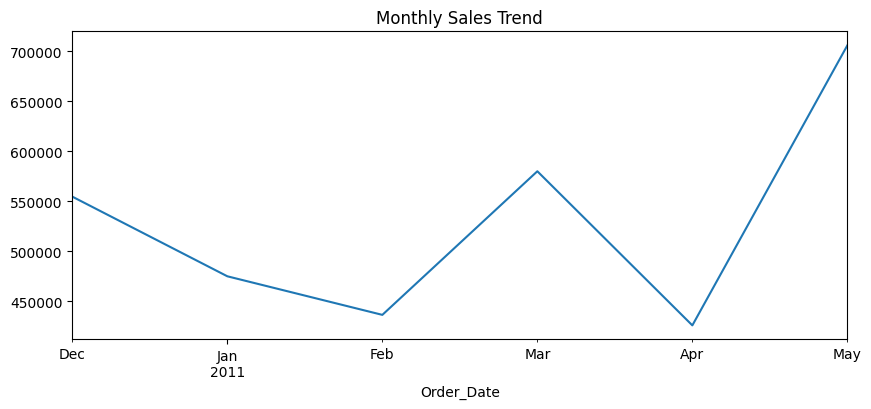

In [ ]:
#TIME-BASED SALES ANALYSIS
#Monthly Sales Trend
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M'))['Revenue'].sum()

monthly_sales.plot(kind='line', figsize=(10,4), title='Monthly Sales Trend')
plt.show()


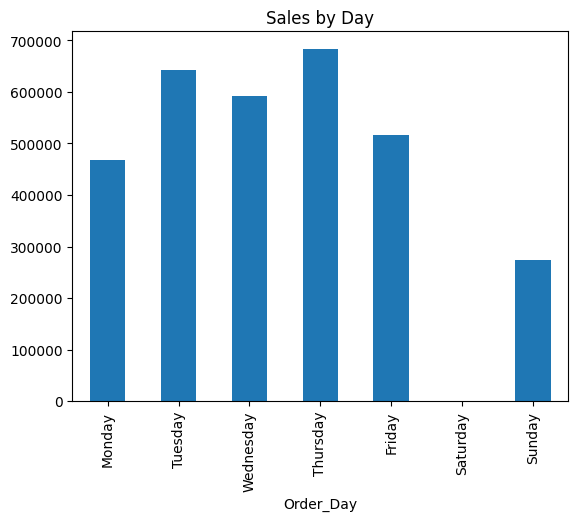

In [ ]:
#Day-wise Sales
day_sales = df.groupby('Order_Day')['Revenue'].sum()
day_sales = day_sales.reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

day_sales.plot(kind='bar', title='Sales by Day')
plt.show()


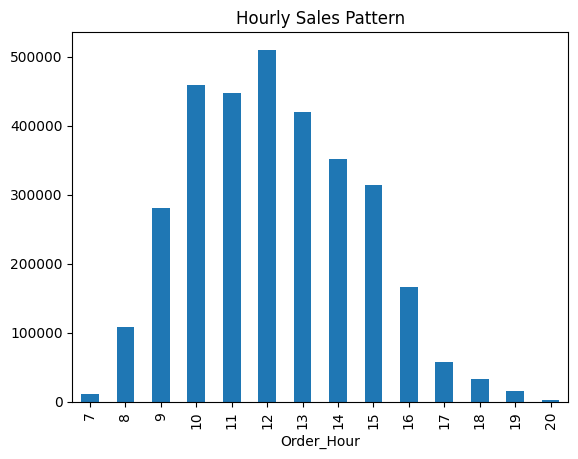

In [ ]:
#Hour-wise Sales
hour_sales = df.groupby('Order_Hour')['Revenue'].sum()

hour_sales.plot(kind='bar', title='Hourly Sales Pattern')
plt.show()


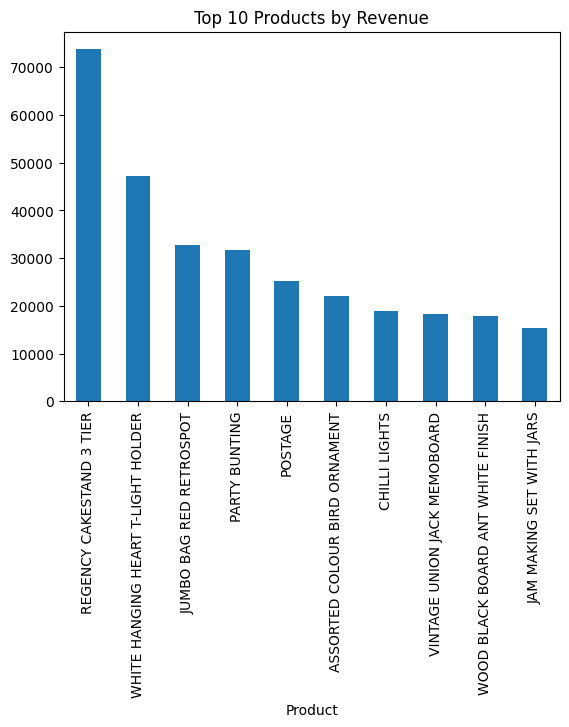

In [ ]:
#PRODUCT & CATEGORY ANALYSIS
#Top Products by Revenue
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', title='Top 10 Products by Revenue')
plt.show()


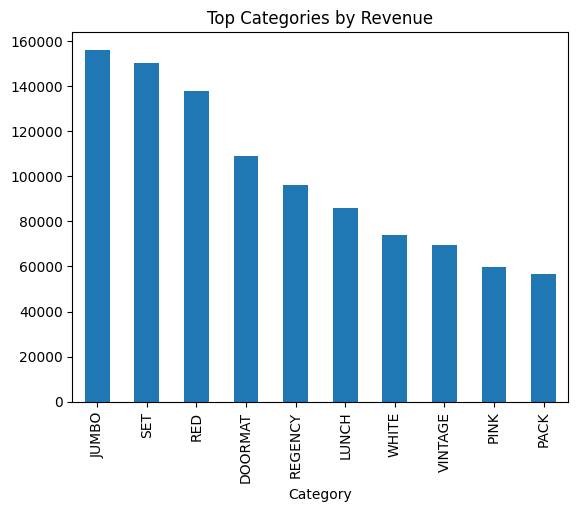

In [ ]:
#Category-wise Sales
df['Category'] = df['Product'].str.split().str[0]
category_sales = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).head(10)

category_sales.plot(kind='bar', title='Top Categories by Revenue')
plt.show()


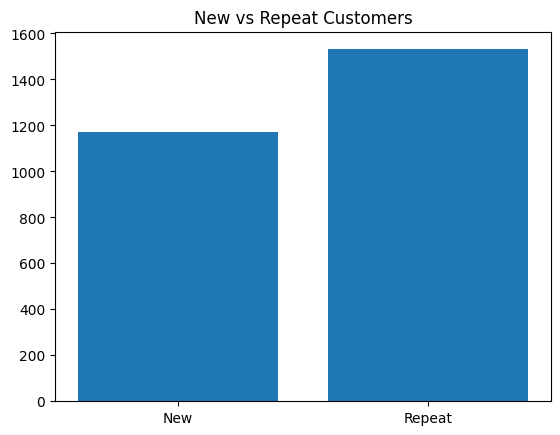

In [ ]:
#CUSTOMER BEHAVIOR ANALYSIS
#New vs Repeat Customers
customer_orders = df.groupby('Customer_ID')['Order_ID'].nunique()

repeat_customers = customer_orders[customer_orders > 1].count()
new_customers = customer_orders[customer_orders == 1].count()

plt.bar(['New','Repeat'], [new_customers, repeat_customers])
plt.title('New vs Repeat Customers')
plt.show()


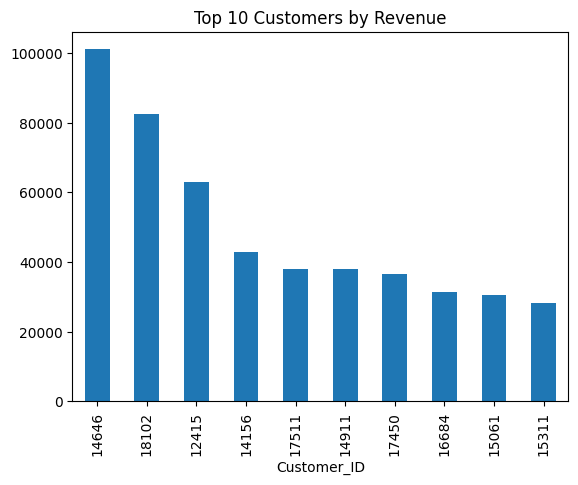

In [ ]:
#Top Customers by Revenue
top_customers = df.groupby('Customer_ID')['Revenue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue')
plt.show()


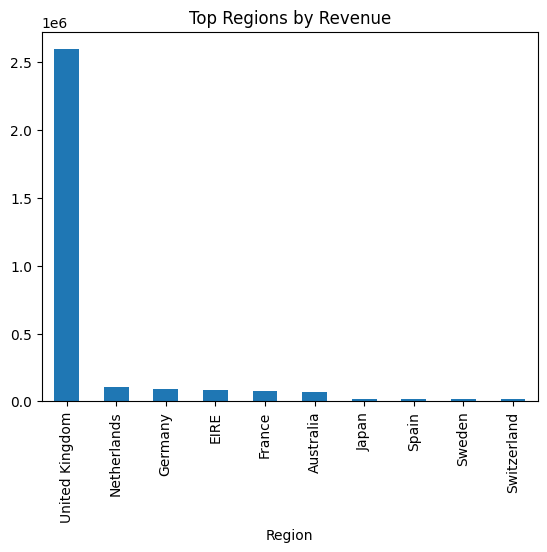

In [ ]:
#GEOGRAPHICAL ANALYSIS
region_sales = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False).head(10)

region_sales.plot(kind='bar', title='Top Regions by Revenue')
plt.show()


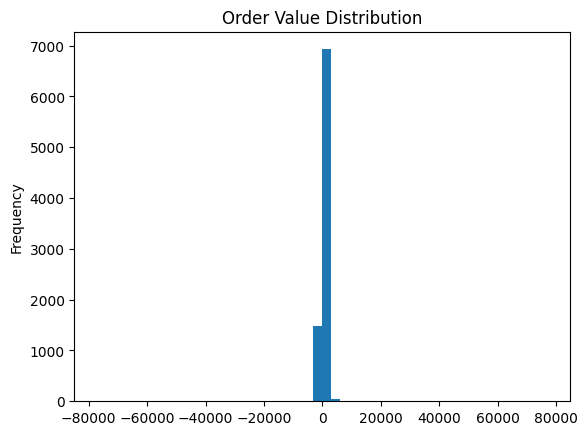

In [ ]:
#DISTRIBUTION ANALYSIS
order_value = df.groupby('Order_ID')['Revenue'].sum()

order_value.plot(kind='hist', bins=50, title='Order Value Distribution')
plt.show()


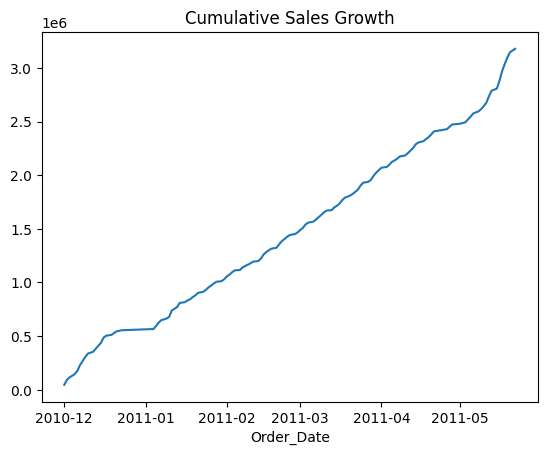

In [ ]:
#CUMULATIVE SALES TREND
daily_sales = df.groupby(df['Order_Date'].dt.date)['Revenue'].sum()
cumulative_sales = daily_sales.cumsum()

cumulative_sales.plot(title='Cumulative Sales Growth')
plt.show()


In [ ]:
#PARETO ANALYSIS
product_sales = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
cum_percent = product_sales.cumsum() / product_sales.sum() * 100

cum_percent.head(10)


,Revenue
Product,
REGENCY CAKESTAND 3 TIER,2.321345
WHITE HANGING HEART T-LIGHT HOLDER,3.810579
JUMBO BAG RED RETROSPOT,4.844181
PARTY BUNTING,5.841156
POSTAGE,6.633188
ASSORTED COLOUR BIRD ORNAMENT,7.326943
CHILLI LIGHTS,7.923879
VINTAGE UNION JACK MEMOBOARD,8.500723
WOOD BLACK BOARD ANT WHITE FINISH,9.065658


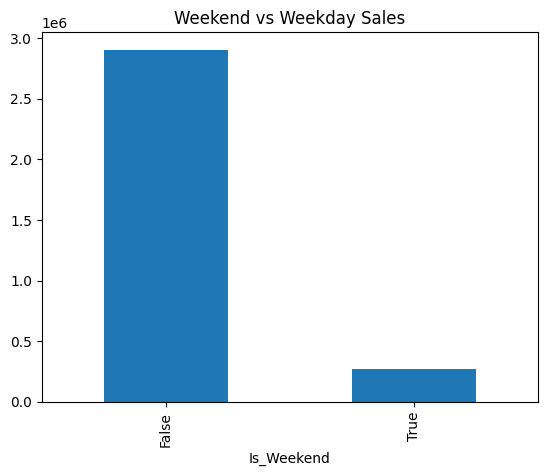

In [ ]:
#WEEKDAY vs WEEKEND COMPARISON
weekend_sales = df.groupby('Is_Weekend')['Revenue'].sum()
weekend_sales.plot(kind='bar', title='Weekend vs Weekday Sales')
plt.show()


In [ ]:
#CUSTOMER CONTRIBUTION %
customer_revenue = df.groupby('Customer_ID')['Revenue'].sum()
top_10_percent = customer_revenue.quantile(0.9)

top_customers_revenue = customer_revenue[customer_revenue >= top_10_percent].sum()
total_revenue = customer_revenue.sum()

print("Top 10% customers contribution:",
      round(top_customers_revenue / total_revenue * 100, 2), "%")


Top 10% customers contribution: 56.04 %


In [ ]:
## Day 3 Key Insights

#- Sales show seasonal patterns with peak during specific months
#- Highest sales occur during evening hours
#- Repeat customers contribute significant revenue
#- A small number of products generate most revenue
#- Certain regions outperform others

## EDA Conclusion

#EDA revealed clear time-based sales patterns, revenue concentration among
#few products and customers, and strong repeat customer contribution.
#These insights guide further customer segmentation and KPI analysis.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/cleaned_data (2).csv")
df['Order_Date'] = pd.to_datetime(df['Order_Date'])


In [ ]:
#REFERENCE DATE SET
reference_date = df['Order_Date'].max() + pd.Timedelta(days=1)
reference_date


Timestamp('2011-05-23 13:01:00')

In [ ]:
#RFM METRICS
#R = Recency
#F = Frequency
#M = Monetary
#Total revenue
rfm = df.groupby('Customer_ID').agg({
    'Order_Date': lambda x: (reference_date - x.max()).days,
    'Order_ID': 'nunique',
    'Revenue': 'sum'
}).reset_index()

rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,Customer_ID,Recency,Frequency,Monetary
0,12346,125,2,0.00
1,12347,46,3,1823.43
2,12348,48,3,1487.24
3,12350,109,1,334.40
4,12352,61,8,601.18


In [ ]:
#QUARTILES CREATE
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])


In [ ]:
#FINAL RFM SCORE
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + \
                   rfm['F_Score'].astype(str) + \
                   rfm['M_Score'].astype(str)

rfm.head()

,Customer_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,125,2,0.00,1,2,1,121
1,12347,46,3,1823.43,3,3,4,334
2,12348,48,3,1487.24,2,3,4,234
3,12350,109,1,334.40,1,1,2,112
4,12352,61,8,601.18,2,4,3,243


In [ ]:
#CUSTOMER SEGMENTS
def segment_customer(row):
    if row['RFM_Score'] >= '444':
        return 'Champions'
    elif row['R_Score'] == '4':
        return 'Loyal Customers'
    elif row['F_Score'] == '4':
        return 'Frequent Buyers'
    elif row['M_Score'] == '4':
        return 'High Spenders'
    else:
        return 'At Risk'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm['Segment'].value_counts()


,count
Segment,
At Risk,2438
Champions,266


<Axes: title={'center': 'Revenue by Customer Segment'}, xlabel='Segment'>

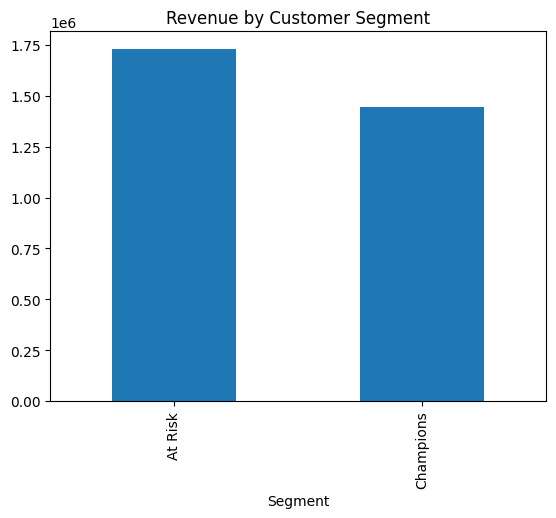

In [ ]:
#SEGMENT-WISE BUSINESS VIEW
#Revenue Contribution by Segment
segment_revenue = rfm.groupby('Segment')['Monetary'].sum()

segment_revenue.plot(kind='bar', title='Revenue by Customer Segment')


In [ ]:
#Average Metrics per Segment
rfm.groupby('Segment')[['Recency','Frequency','Monetary']].mean()


,Recency,Frequency,Monetary
Segment,,,
At Risk,65.795324,2.281378,709.829713
Champions,6.616541,11.015038,5441.219436


In [ ]:
#RFM SEGMENT SIZE
segment_count = rfm['Segment'].value_counts(normalize=True) * 100
segment_count


,proportion
Segment,
At Risk,90.162722
Champions,9.837278


<Axes: title={'center': 'Profit by Customer Segment'}, xlabel='Segment'>

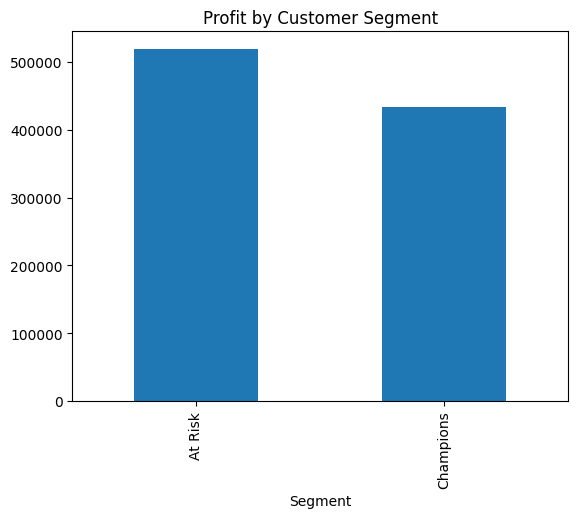

In [ ]:
#CUSTOMER SEGMENT PROFIT VIEW
rfm['Profit'] = rfm['Monetary'] * 0.30

profit_by_segment = rfm.groupby('Segment')['Profit'].sum()
profit_by_segment.plot(kind='bar', title='Profit by Customer Segment')


In [ ]:
## Day 4 – RFM Insights

#- Champions contribute the highest revenue despite smaller count
#- Loyal customers show high frequency and moderate spending
#- At-risk customers have high recency and low engagement
#- Targeted marketing can significantly improve retention and revenue

## Customer Segment Strategy

#Segment | Business Action

 #Champions | Exclusive offers & early access
 #Loyal Customers | Reward programs
 #Frequent Buyers | Cross-selling
 #High Spenders | Premium bundles
 #At Risk | Win-back campaigns